## Aula 1 Video 1 - Entendendo os seus dados

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

Você pode baixar o arquivo CSV [regressao_linear_alura.csv](https://s3.amazonaws.com/caelum-online-public/machine-learning-aprendizado-supervisionado/regressao_linear_alura.csv).

In [2]:
movies = pd.read_csv('datasets/regressao_linear_alura.csv')

In [3]:
movies.head()

,movieId,Titulo,Investimento (em milhoes),Bilheteria (pessoas)
0,1,Toy Story (1995),11.048216,5623234.602
1,2,Jumanji (1995),14.927678,5714951.757
2,3,Grumpier Old Men (1995),27.114597,9524339.124
3,4,Waiting to Exhale (1995),4.994242,6331568.779
4,5,Father of the Bride Part II (1995),19.142246,6409617.277


In [4]:
movies.shape

(9125, 4)

In [5]:
x = movies['Investimento (em milhoes)']

In [6]:
y = movies['Bilheteria (pessoas)']

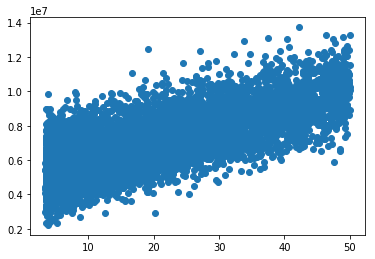

In [7]:
plt.scatter(x,y)

In [8]:
sample = movies.sample(n=200)

In [9]:
x = sample['Investimento (em milhoes)']

In [10]:
y = sample['Bilheteria (pessoas)']

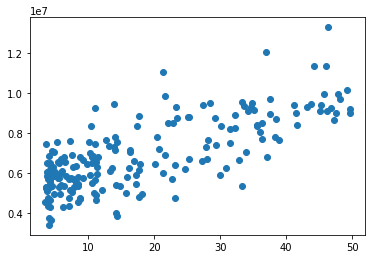

In [11]:
plt.scatter(x,y)

## Aula 1 - Video 2 - A regressão linear

In [12]:
filmes_investimento = movies['Investimento (em milhoes)']
filmes_bilheteria = movies['Bilheteria (pessoas)']

In [13]:
type(filmes_investimento)

pandas.core.series.Series

In [14]:
filmes_investimento.head(10)

0    11.048216
1    14.927678
2    27.114597
3     4.994242
4    19.142246
5     9.977311
6    14.257461
7     8.871800
8    29.112800
9     3.695241
Name: Investimento (em milhoes), dtype: float64

In [15]:
filmes_bilheteria.head(10)

0    5623234.602
1    5714951.757
2    9524339.124
3    6331568.779
4    6409617.277
5    4956557.317
6    4654565.066
7    3950017.325
8    6850971.551
9    5157865.850
Name: Bilheteria (pessoas), dtype: float64

In [16]:
treino, teste, treino_bilheteria, teste_bilheteria = train_test_split(filmes_investimento, filmes_bilheteria)

In [17]:
print('Tamanho treino: {0} Tamanho teste: {1} Total: {2} ({0} + {1})'.format(len(treino), len(teste), len(filmes_investimento)))

Tamanho treino: 6843 Tamanho teste: 2282 Total: 9125 (6843 + 2282)


In [18]:
print('Porcentagem treino {}'.format(len(treino)/len(filmes_investimento)))

Porcentagem treino 0.7499178082191781


In [19]:
type(treino)

pandas.core.series.Series

In [20]:
treino = np.array(treino).reshape(len(treino),1)

In [21]:
type(treino)

numpy.ndarray

In [22]:
teste = np.array(teste).reshape(len(teste),1)

In [23]:
type(teste)

numpy.ndarray

In [24]:
treino_bilheteria = np.array(treino_bilheteria).reshape(len(treino_bilheteria),1)
teste_bilheteria= np.array(teste_bilheteria).reshape(len(teste_bilheteria),1)

In [25]:
modelo = LinearRegression()
modelo.fit(treino, treino_bilheteria)
modelo

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [26]:
modelo.intercept_

array([5061822.51433027])

In [27]:
modelo.coef_

array([[98175.0312272]])

#### Investimento Zootopia 27.74456356

In [28]:
modelo.predict(27.74456356)

array([[7785645.90821837]])

In [29]:
modelo.coef_ * 27.74456356 + modelo.intercept_

array([[7785645.90821837]])

In [30]:
modelo.score(treino, treino_bilheteria)

0.5381540257623925

In [31]:
modelo.score(teste, teste_bilheteria)

0.5241690949457528

### Testando split dos dados de treino e teste com 10%

In [32]:
treino, teste, treino_bilheteria, teste_bilheteria = train_test_split(
    filmes_investimento, filmes_bilheteria, test_size=0.10)

In [33]:
treino = np.array(treino).reshape(len(treino),1)
treino_bilheteria = np.array(treino_bilheteria).reshape(len(treino_bilheteria),1)
teste_bilheteria= np.array(teste_bilheteria).reshape(len(teste_bilheteria),1)
teste = np.array(teste).reshape(len(teste),1)

In [34]:
modelo_10 = LinearRegression()
modelo_10.fit(treino, treino_bilheteria)
modelo_10

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [35]:
modelo_10.score(treino, treino_bilheteria)

0.5340194494811332

In [36]:
modelo_10.score(teste, teste_bilheteria)

0.5415247778455837